In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
ticker = 'BTC-USD'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']

In [3]:
log_returns= np.log(1 + data.pct_change())

In [4]:
log_returns.tail()

,BTC-USD
Date,
2020-06-21,0.036420
2020-06-22,-0.001977
2020-06-23,-0.033371
2020-06-24,-0.005253
2020-06-26,-0.007830


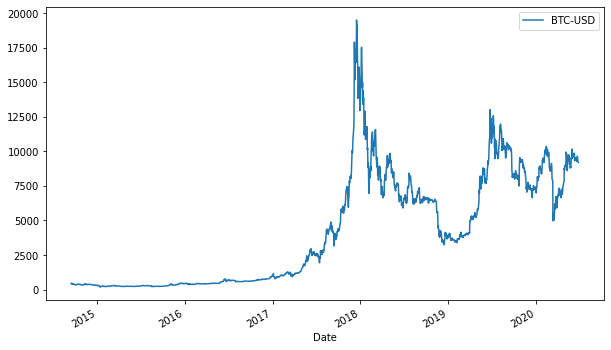

In [5]:
data.plot(figsize=(10,6));

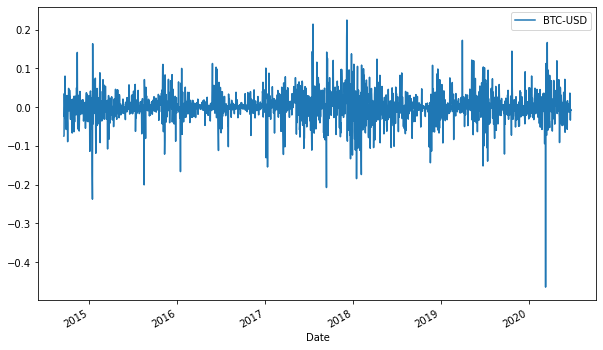

In [6]:
log_returns.plot(figsize=(10,6))
plt.show()

In [7]:
u = log_returns.mean()
u

BTC-USD    0.001423
dtype: float64

In [8]:
var = log_returns.var()
var

BTC-USD    0.001575
dtype: float64

In [9]:
drift = u- (0.5 * var)
drift

BTC-USD    0.000635
dtype: float64

In [10]:
stdev = log_returns.std()
stdev

BTC-USD    0.039691
dtype: float64

2.nd part

In [11]:
type(drift)

pandas.core.series.Series

In [12]:
type(stdev)

pandas.core.series.Series

In [13]:
np.array(drift)

array([0.00063512])

In [14]:
drift.values

array([0.00063512])

In [15]:
stdev.values

array([0.0396913])

In [16]:
norm.ppf(0.95)

1.6448536269514722

In [17]:
x = np.random.rand(10,2)
x

array([[0.19829106, 0.60365415],
       [0.41905395, 0.26059901],
       [0.8328694 , 0.2875025 ],
       [0.39032922, 0.11773609],
       [0.89645471, 0.78512777],
       [0.70023633, 0.17659571],
       [0.52206447, 0.83935382],
       [0.48972807, 0.37327435],
       [0.61516753, 0.99404875],
       [0.16112126, 0.6670989 ]])

In [18]:
norm.ppf(x)

array([[-0.84774119,  0.2628169 ],
       [-0.2043143 , -0.64149978],
       [ 0.96556641, -0.5606957 ],
       [-0.27846108, -1.18638023],
       [ 1.26160603,  0.78962903],
       [ 0.52508035, -0.92841676],
       [ 0.05533565,  0.99180562],
       [-0.02575076, -0.32319351],
       [ 0.2928132 ,  2.51502165],
       [-0.98986005,  0.43191637]])

In [19]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-1.15916256,  0.03836605],
       [ 0.72943561, -0.59084658],
       [ 0.17101788, -2.02143208],
       [-0.72311758, -0.8504695 ],
       [ 0.6660145 ,  0.35650295],
       [-0.48135922, -2.09164559],
       [ 1.06940824, -0.95678631],
       [-0.9123685 , -2.92089512],
       [ 1.20855455,  0.05546273],
       [ 1.43709847,  0.67487371]])

In [20]:
t_intervals = 60
iterations = 5

In [21]:
daily_returns = np.exp(drift.values + stdev.values*norm.ppf(np.random.rand(t_intervals, iterations)))

In [22]:
daily_returns

array([[0.98079334, 0.99724864, 0.98576062, 1.01964789, 1.01085408],
       [1.01644021, 0.99771479, 1.01095996, 0.9847115 , 1.01280473],
       [1.05811278, 1.00492578, 0.9708435 , 0.92797758, 0.96448747],
       [0.95399484, 1.01557877, 0.9797948 , 1.01288338, 1.00946804],
       [0.98314996, 1.04373448, 1.04850535, 0.97821735, 0.99566738],
       [0.99117281, 1.05998649, 0.9599404 , 0.92627469, 1.01457403],
       [1.03624648, 0.95681957, 1.01767112, 1.00585544, 1.01408178],
       [1.03849839, 0.9657614 , 1.08741491, 1.04536814, 1.03032553],
       [0.95012558, 0.97298028, 0.98147811, 1.02639745, 0.99730915],
       [1.02055248, 1.00524529, 1.02972984, 1.01881525, 1.05614825],
       [0.89847397, 1.03576774, 0.95285051, 0.99546612, 1.03837789],
       [0.99046249, 0.99900949, 0.99587886, 0.8963139 , 1.00319614],
       [0.98094668, 1.01105619, 0.97670987, 0.96575164, 0.98185492],
       [0.94075723, 0.96379049, 1.05326082, 0.96716565, 0.92586413],
       [1.01548542, 0.97531297, 0.

3rd part


In [23]:
S0 = data.iloc[-1]
S0

BTC-USD    9192.548828
Name: 2020-06-26 00:00:00, dtype: float64

In [24]:
price_list = np.zeros_like(daily_returns)

In [25]:
price_list

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0.

In [26]:
price_list[0] = S0
price_list

array([[9192.54882812, 9192.54882812, 9192.54882812, 9192.54882812,
        9192.54882812],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0

In [27]:
for t in range(1, t_intervals):
  price_list[t] = price_list[t-1] * daily_returns[t]

In [28]:
price_list

array([[ 9192.54882812,  9192.54882812,  9192.54882812,  9192.54882812,
         9192.54882812],
       [ 9343.67623114,  9171.54193206,  9293.29882475,  9052.00856079,
         9310.2569456 ],
       [ 9886.66327219,  9216.71888428,  9022.33872151,  8400.0609699 ,
         8979.6261722 ],
       [ 9431.82577161,  9360.30398212,  8840.04054402,  8508.28215121,
         9064.64563642],
       [ 9272.89911846,  9769.67197979,  9268.82981153,  8322.94918877,
         9025.37197034],
       [ 9191.04545639, 10355.7202638 ,  8897.52418149,  7709.33718208,
         9156.90797371],
       [ 9524.18847083,  9908.5558251 ,  9054.75337056,  7754.47876452,
         9285.85356635],
       [ 9890.85443096,  9569.30076337,  9846.27378022,  8106.28500519,
         9567.45196101],
       [ 9397.5538439 ,  9310.74089433,  9663.90220707,  8320.27025703,
         9541.70733795],
       [ 9590.6968556 ,  9359.57840366,  9951.20850513,  8476.81819215,
        10077.45751032],
       [ 8616.99152587,  9694.

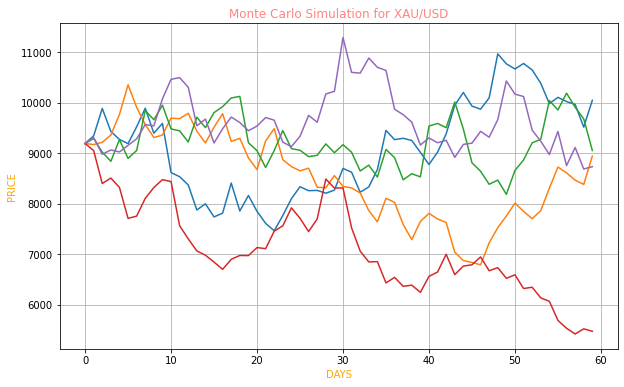

In [29]:
plt.figure(figsize=(10,6))
plt.plot(price_list) 
plt.grid(True)
plt.xlabel('DAYS', color='orange')
plt.ylabel('PRICE', color='orange')
plt.title('Monte Carlo Simulation for XAU/USD',color='#FF8484')
plt.show()